# Explore here

In [68]:
# Your code here
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2, SelectKBest
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 

#creamos una variable con los la tabla del csv indicando la separación entre campos.

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep = ';')



In [69]:
df.shape


(41188, 21)

In [70]:

# Eliminamos los duplicados

df = df.drop_duplicates().reset_index(drop = True)
df.shape

(41176, 21)

In [71]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [72]:
# Vemos si tenemos valores nulos

df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [73]:
# vamos a ver si encontramos valores únicos

df.nunique()


age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [74]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## Por fin he entendido que si usaba la misma variable encoder para todos los objetos, iba sobreescribiendo los objetos y esto podía ser un problema si en un futuro tuviera que rescatar el objeto de la transformación de una variable concreta. Gracias por hacérmelo ver.

In [75]:
#Transformamos los valores no numéricos a enteros

encoder_job = LabelEncoder()
df['job_int'] = encoder_job.fit_transform(df['job'])
encoder_marital = LabelEncoder()
df['marital_int'] = encoder_marital.fit_transform(df['marital'])
encoder_aducation = LabelEncoder()
df['educiation_in'] = encoder_aducation.fit_transform(df['education'])
encoder_default = LabelEncoder()
df['default_int'] = encoder_default.fit_transform(df['default'])
encoder_housing = LabelEncoder()
df['housing_int'] = encoder_housing.fit_transform(df['housing'])
encoder_loan = LabelEncoder()
df['loan_int'] = encoder_loan.fit_transform(df['loan'])
encoder_contact = LabelEncoder()
df['contact_int'] = encoder_contact.fit_transform(df['contact'])
encoder_poutcome = LabelEncoder()
df['poutcome_int'] = encoder_poutcome.fit_transform(df['poutcome'])
encoder_month = LabelEncoder()
df['month_int'] = encoder_month.fit_transform(df['month'])
encoder_day_of_week = LabelEncoder()
df['day_of_week_int'] = encoder_day_of_week.fit_transform(df['day_of_week'])

encoder_y = LabelEncoder()
df['y_int'] = df['y'].map({'yes':1,'no':0})


# y si = 1 no = 0

In [76]:
#generamos el nuevo dataframe quedándonos con los valores numñericos.

df_int = df.drop(['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'], axis = 1)

df_int.dtypes



age                  int64
duration             int64
campaign             int64
pdays                int64
previous             int64
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
job_int              int64
marital_int          int64
educiation_in        int64
default_int          int64
housing_int          int64
loan_int             int64
contact_int          int64
poutcome_int         int64
month_int            int64
day_of_week_int      int64
y_int                int64
dtype: object

In [77]:
# quiero comprobar que los valores no corresponden con 0 y  sí con 1
df_int.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital_int,educiation_in,default_int,housing_int,loan_int,contact_int,poutcome_int,month_int,day_of_week_int,y_int
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,1,6,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,1,0,0,1,1,6,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,2,0,1,1,6,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,1,0,0,0,1,1,6,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,0,2,1,1,6,1,0


In [78]:
# separamos entre conjuntos de test y train

X = df_int.drop("y_int", axis= 1)
y = df_int['y_int']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# quitamos las columnas binarias para hacer el escalado

binary_cols = ['contact_int']

X_train_num = X_train.drop(binary_cols, axis=1)
X_test_num = X_test.drop(binary_cols, axis=1)

# Procedemos a escalar

scaler=MinMaxScaler().fit(X_train_num)

X_train_num_sc = scaler.transform(X_train_num)
X_test_num_sc = scaler.transform(X_test_num)

#Devolvemos las columnas binarias al conjunto de datos

X_train_sc = pd.concat([pd.DataFrame(X_train_num_sc, columns = X_train_num.columns), X_train[binary_cols].reset_index(drop=True)], axis=1)
X_test_sc = pd.concat([pd.DataFrame(X_test_num_sc, columns = X_test_num.columns), X_test[binary_cols].reset_index(drop=True)], axis=1)


<Axes: >

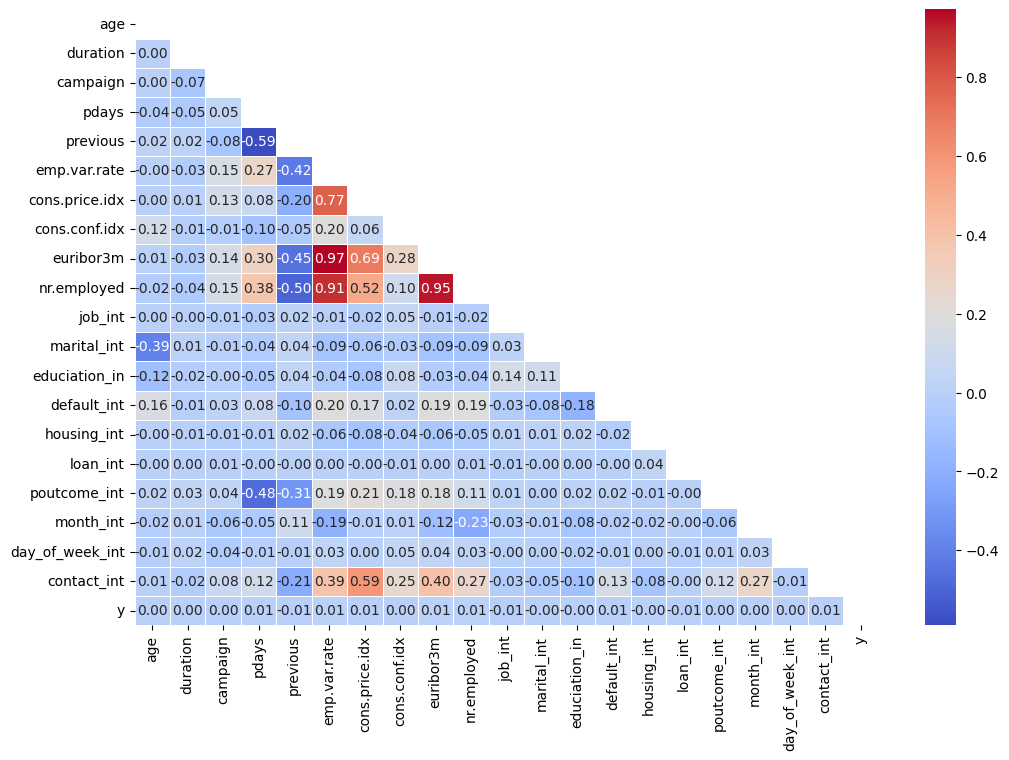

In [80]:
X_corr = X_train_sc.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

## Primera iteración de cribado de variables

In [81]:

#Realizamos el cribado de las variables más importantes para crear el modelo. 

modelo_cribado = SelectKBest(chi2, k=5)
modelo_cribado.fit(X_train_sc,y_train)
selected_features = modelo_cribado.get_support(indices=True)






In [82]:
# trasladamos la selección de las variables al conjunto de datos de test y train

X_train_sel = X_train_sc.iloc[:,selected_features]
X_test_sel = X_test_sc.iloc[:,selected_features]
X_train_sel
X_test_sel

,previous,emp.var.rate,euribor3m,nr.employed,contact_int
0,0.000000,0.104167,0.143278,0.425709,0
1,0.142857,0.333333,0.150759,0.512287,0
2,0.000000,0.479167,0.073679,0.000000,0
3,0.142857,0.333333,0.150759,0.512287,0
4,0.000000,1.000000,0.981410,1.000000,1
...,...,...,...,...,...
8231,0.000000,1.000000,0.982544,1.000000,0
8232,0.000000,0.333333,0.143278,0.512287,1
8233,0.000000,1.000000,0.981410,1.000000,1
8234,0.000000,0.937500,0.956926,0.859735,1


In [83]:
# vamos a ver la independencia de las variables seleccionadas

vif = pd.Series([variance_inflation_factor(X_train_sel.corr().values, i) for i in range(X_train_sel.corr().shape[1])], index=X_train_sel.columns)
vif

previous           5.414796
emp.var.rate    2388.636131
euribor3m       5646.805800
nr.employed      992.161870
contact_int       12.203675
dtype: float64

Vemos que las vriables están altamente relacionadas. también se podía vislumnrar en la matriz de correlación. De todas voy a dejar euribor3m y voy a quitar el resto para volver a hacer la selección. 

## Segunda iteración de cribado de variables

In [84]:
X_train_sc_2 = X_train_sc.drop(['previous','emp.var.rate','nr.employed','contact_int'], axis=1)
X_test_sc_2 = X_test_sc.drop(['previous','emp.var.rate','nr.employed','contact_int'], axis=1)

In [85]:
modelo_cribado = SelectKBest(chi2, k=5)
modelo_cribado.fit(X_train_sc_2,y_train)
selected_features = modelo_cribado.get_support(indices=True)
selected_features

array([ 1,  3,  4,  6, 10])

In [86]:
X_train_sel_2 = X_train_sc_2.iloc[:,selected_features]
X_test_sel_2 = X_test_sc_2.iloc[:,selected_features]
X_train_sel_2
X_test_sel_2

,duration,pdays,cons.price.idx,euribor3m,default_int
0,0.296869,1.0,0.296960,0.143278,0.0
1,0.050427,1.0,0.269680,0.150759,0.0
2,0.055917,1.0,0.935308,0.073679,0.0
3,0.037820,1.0,0.269680,0.150759,0.0
4,0.037414,1.0,0.669135,0.981410,0.0
...,...,...,...,...,...
8231,0.015453,1.0,0.484412,0.982544,0.0
8232,0.001423,1.0,0.269680,0.143278,0.0
8233,0.021553,1.0,0.669135,0.981410,0.5
8234,0.021553,1.0,0.698753,0.956926,0.0


<Axes: >

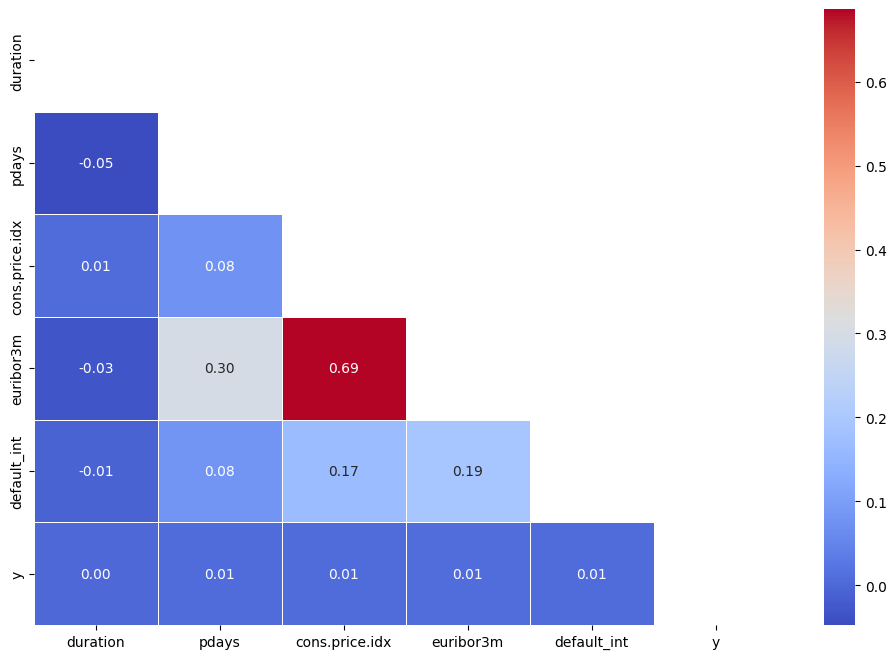

In [87]:
X_corr = X_train_sel_2.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [88]:
vif = pd.Series([variance_inflation_factor(X_train_sel_2.corr().values, i) for i in range(X_train_sel_2.corr().shape[1])], index=X_train_sel_2.columns)
vif

duration           1.016715
pdays              1.815411
cons.price.idx     8.957593
euribor3m         11.103857
default_int        1.189455
dtype: float64

Voy a cargarme ahora la variable cons.price.idx por estar muy correlacionada con euribor3m


## Tercera iteración de cribado de variables

In [89]:
X_train_sc_3 = X_train_sc_2.drop(['cons.price.idx'], axis=1)
X_test_sc_3 = X_test_sc_2.drop(['cons.price.idx'], axis=1)

In [90]:
modelo_cribado = SelectKBest(chi2, k=5)
modelo_cribado.fit(X_train_sc_3,y_train)
selected_features = modelo_cribado.get_support(indices=True)
selected_features

array([ 1,  3,  5,  9, 12])

In [91]:
X_train_sel_3 = X_train_sc_3.iloc[:,selected_features]
X_test_sel_3= X_test_sc_3.iloc[:,selected_features]
X_train_sel_3
X_test_sel_3

,duration,pdays,euribor3m,default_int,poutcome_int
0,0.296869,1.0,0.143278,0.0,0.5
1,0.050427,1.0,0.150759,0.0,0.0
2,0.055917,1.0,0.073679,0.0,0.5
3,0.037820,1.0,0.150759,0.0,0.0
4,0.037414,1.0,0.981410,0.0,0.5
...,...,...,...,...,...
8231,0.015453,1.0,0.982544,0.0,0.5
8232,0.001423,1.0,0.143278,0.0,0.5
8233,0.021553,1.0,0.981410,0.5,0.5
8234,0.021553,1.0,0.956926,0.0,0.5


<Axes: >

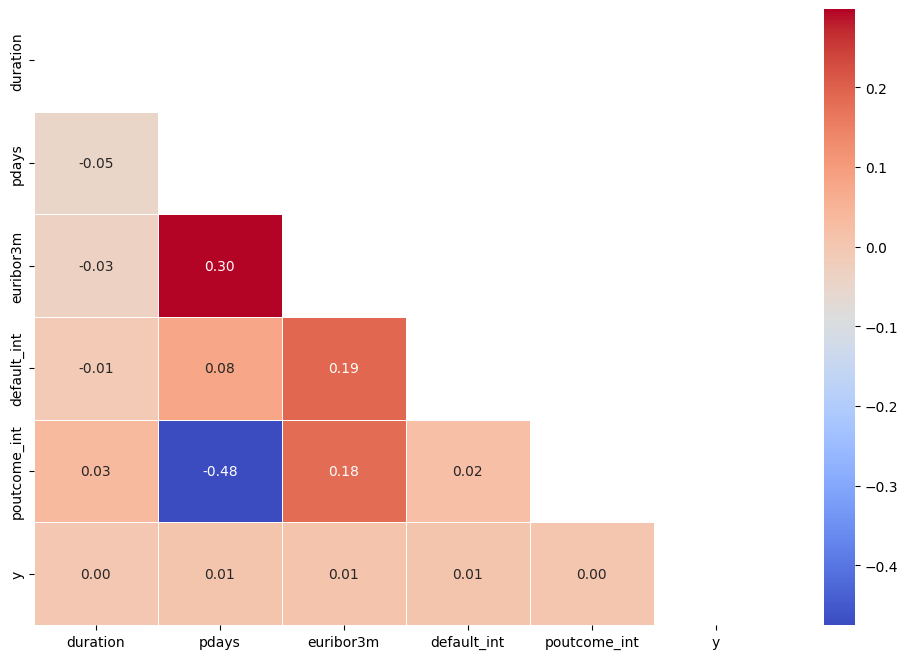

In [92]:
X_corr = X_train_sel_3.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [93]:
vif = pd.Series([variance_inflation_factor(X_train_sel_3.corr().values, i) for i in range(X_train_sel_3.corr().shape[1])], index=X_train_sel_3.columns)
vif

duration        1.013172
pdays           4.981721
euribor3m       2.873961
default_int     1.164896
poutcome_int    4.231285
dtype: float64

## Creación del modelo de Regresión logística

In [94]:
# Finalmente creamos el objeto modelo de la clase LogisticRegression.

model = LogisticRegression()
model.fit(X_train_sel_3,y_train)


LogisticRegression()

In [95]:
# Generamos el array con los datos de la prediccióin 

y_pred = model.predict(X_test_sel_3)
y_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(8236,))

In [96]:
#Vemos cuánto se ajusta el modelo a la realidad. Desde mi punto de vista no está nada mal. 

accuracy_score(y_test,y_pred)

0.9010441962117532